# Credit Risk Evaluator

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [6]:
 # Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [7]:
# Import the data

df = pd.read_csv('Resources/lending_data.csv')
df.head(30)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
5,10100.0,7.438,50600,0.407115,4,1,20600,0
6,10300.0,7.490,51100,0.412916,4,1,21100,0
7,8800.0,6.857,45100,0.334812,3,0,15100,0
8,9300.0,7.096,47400,0.367089,3,0,17400,0
9,9700.0,7.248,48800,0.385246,4,0,18800,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [8]:
df.loan_status.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

Predictions:  The possibility of default will correlate most strongly with debt_to_income ratio. However, our results may not be very valid because less than four percent of accounts have defaulted.

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [14]:
features = df.columns.tolist()
features.pop()
features

['loan_size',
 'interest_rate',
 'borrower_income',
 'debt_to_income',
 'num_of_accounts',
 'derogatory_marks',
 'total_debt']

In [15]:
# Split the data into X_train, X_test, y_train, y_test

X = df.loc[:, features].values
y = df.loc[:, ["loan_status"]].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # use stratify for classification models
print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")


0.7 : 0.3


## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [45]:
# Train a Logistic Regression model and print the model score

lr = LogisticRegression(max_iter=10000) # init
lr.fit(X_train, y_train) # fit

train_preds = lr.predict(X_train) # predict
pd.DataFrame(train_preds).value_counts()

0    52431
1     1844
dtype: int64

In [61]:
test_preds = lr.predict(X_test)
test_proba = lr.predict_proba(X_test)
print(pd.DataFrame(test_proba).head(20))

           0         1
0   0.999483  0.000517
1   0.999081  0.000919
2   0.999285  0.000715
3   0.998727  0.001273
4   0.999870  0.000130
5   0.998559  0.001441
6   0.996870  0.003130
7   0.999937  0.000063
8   0.068389  0.931611
9   0.997236  0.002764
10  0.999104  0.000896
11  0.999856  0.000144
12  0.998522  0.001478
13  0.999578  0.000422
14  0.999876  0.000124
15  0.996362  0.003638
16  0.977729  0.022271
17  0.998595  0.001405
18  0.993379  0.006621
19  0.140719  0.859281


In [49]:
print(confusion_matrix(y_train, train_preds))
print()
print(classification_report(y_train, train_preds))

[[52407   118]
 [   30  1720]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52525
           1       0.94      0.98      0.96      1750

    accuracy                           1.00     54275
   macro avg       0.97      0.99      0.98     54275
weighted avg       1.00      1.00      1.00     54275



In [50]:
print(confusion_matrix(y_test, test_preds))
print()
print(classification_report(y_test, test_preds))

[[22411   100]
 [   76   674]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22511
           1       0.87      0.90      0.88       750

    accuracy                           0.99     23261
   macro avg       0.93      0.95      0.94     23261
weighted avg       0.99      0.99      0.99     23261



AUC for the Model Test Set: 0.9968795107577036


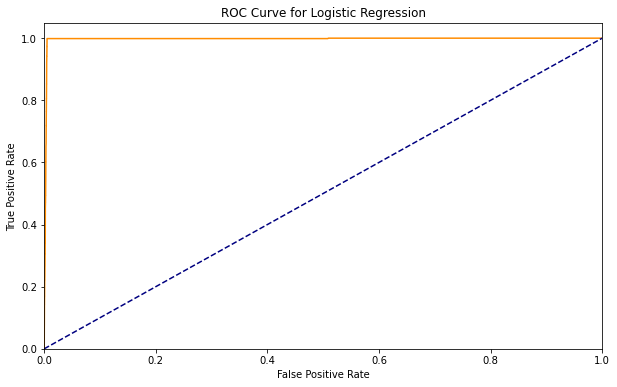

In [51]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the Model Test Set: {roc_auc_knn}")

# make plot
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.show()

In [52]:
print("Brier Score:")
print(sum((y_test - test_proba[:,1])**2))

Brier Score:
132.40735746449192


The logistic regression model works fantastically. It turns out that using these columns, we are able to correctly identify 92% of the accounts 
that would default. Moreover, if we did identify an account that would default, there was an 87% chance that it would indeed default so our precision 
was high as well. The ROC curve is almost perfect as the area under the curve is almost perfectly equal to 1.

In [64]:
# Train a Random Forest Classifier model and print the model score

rf = RandomForestClassifier() # init
rf.fit(X_train, y_train) # fit

train_preds = rf.predict(X_train) # predict
test_preds = rf.predict(X_test)
test_proba = rf.predict_proba(X_test)

In [65]:
print(pd.DataFrame(test_proba).head(20))

           0         1
0   1.000000  0.000000
1   1.000000  0.000000
2   1.000000  0.000000
3   1.000000  0.000000
4   1.000000  0.000000
5   1.000000  0.000000
6   1.000000  0.000000
7   1.000000  0.000000
8   0.034333  0.965667
9   1.000000  0.000000
10  1.000000  0.000000
11  1.000000  0.000000
12  1.000000  0.000000
13  1.000000  0.000000
14  1.000000  0.000000
15  1.000000  0.000000
16  1.000000  0.000000
17  1.000000  0.000000
18  1.000000  0.000000
19  0.048095  0.951905


In [66]:
print(confusion_matrix(y_train, train_preds))
print()
print(classification_report(y_train, train_preds))

[[52407   118]
 [   30  1720]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52525
           1       0.94      0.98      0.96      1750

    accuracy                           1.00     54275
   macro avg       0.97      0.99      0.98     54275
weighted avg       1.00      1.00      1.00     54275



In [67]:
print(confusion_matrix(y_test, test_preds))
print()
print(classification_report(y_test, test_preds))

[[22411   100]
 [   79   671]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22511
           1       0.87      0.89      0.88       750

    accuracy                           0.99     23261
   macro avg       0.93      0.95      0.94     23261
weighted avg       0.99      0.99      0.99     23261



AUC for the Model Test Set: 0.996954111323353


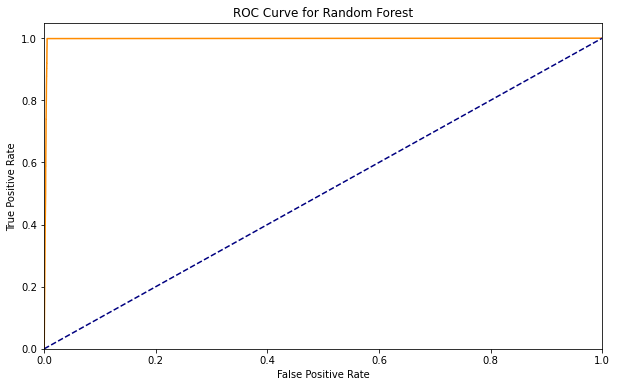

In [68]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the Model Test Set: {roc_auc_knn}")

# make plot
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

In [69]:
print("Brier Score:")
print(sum((y_test - test_proba[:,1])**2))

Brier Score:
138.23130972620737


The random Forest classifier was a little worse than logistic regression as it only identified 90% of accounts that would default rather than
92% for Logistic Regression. However, we will also look at the ROC curves for each. Moreover, there are signs of overfitting as the test data
had a 98% recall, which is far higher than for the test data. The ROC curve is almost perfect, which means that unless the false positive rate is set to be negligibly small, the true positive rate will be very close to 1.

*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*

The Logistic Regression performed slightly better than the Random Forest model although both models performed impeccably. Since the Logistic Regression
model is based on least squares regression, it is easier to explain, and it is the one I would select. The Briar Score for the Random Forest is also
just a small bit higher than for Logistic Regression.

In [70]:
sorted(list(zip(rf.feature_importances_, features)))

[(0.0001282533584591269, 'derogatory_marks'),
 (0.04435560304431069, 'num_of_accounts'),
 (0.08097935586913618, 'total_debt'),
 (0.12758425287096356, 'loan_size'),
 (0.23534401554015016, 'interest_rate'),
 (0.23850869874989855, 'debt_to_income'),
 (0.27309982056708154, 'borrower_income')]

We see that "borrower_income", "debt_to_income", and "interest_rate" are the three most important columns to determine whether a loan will be 
defaulted. In this case, our prediction was very good. However, the model was also very good showing that the data was sufficient to create a great model.